## 1.	Data Loading and Initial Inspection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1. Loading of the Dataset into our environment

In [3]:
path="airlines_flights_data.csv"
airlines_df=pd.read_csv(path)


#### 1.2. View First & Last Rows

In [4]:
airlines_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
airlines_df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


#### 1.3. Information of dataset

In [6]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#### 1.4. Check Shape (Rows & Columns)

In [7]:
airlines_df.shape

(300153, 12)

#### 1.5. Check Column Names

In [8]:
airlines_df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

#### 1.6. Check Data Types

In [9]:
airlines_df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

#### 1.7. Check Missing Values

In [10]:
airlines_df.isna().sum()/len(airlines_df)

index               0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

#### 1.8. Statistical Summary (Numerical Columns)

In [11]:
airlines_df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


#### 1.9. Check Value Ranges 

In [12]:
print("min price value is = ",airlines_df['price'].min())
print("max price value is = ",airlines_df['price'].max())

min price value is =  1105
max price value is =  123071


#### 1.10. Checking and removing Duplicate Rows

In [13]:
airlines_df.duplicated().sum()

np.int64(0)

## 2. Feature Engineering

#### 2.1. Extraction of hours and minutes

In [14]:
# Accurate duration conversion
airlines_df["duration_hours"] = airlines_df["duration"].apply(lambda x: int(x))
airlines_df["duration_minutes_only"] = airlines_df["duration"].apply(lambda x: round((x % 1) * 60))
airlines_df["duration_total_minutes"] = (airlines_df["duration_hours"] * 60) + airlines_df["duration_minutes_only"]

In [15]:
airlines_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_hours,duration_minutes_only,duration_total_minutes
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,10,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2,20,140
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2,10,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,15,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,20,140


#### 2.2 Conversion of Duration to Total Minutes

In [16]:
airlines_df["duration_total_minutes"] = airlines_df["duration_hours"] * 60 + airlines_df["duration_minutes_only"]

In [17]:
airlines_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_hours,duration_minutes_only,duration_total_minutes
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,10,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2,20,140
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2,10,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,15,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,20,140


##  3. Data Visualiztion

#### 3.1.  Univariate analysis

##### 3.1.1.  Price Distribution

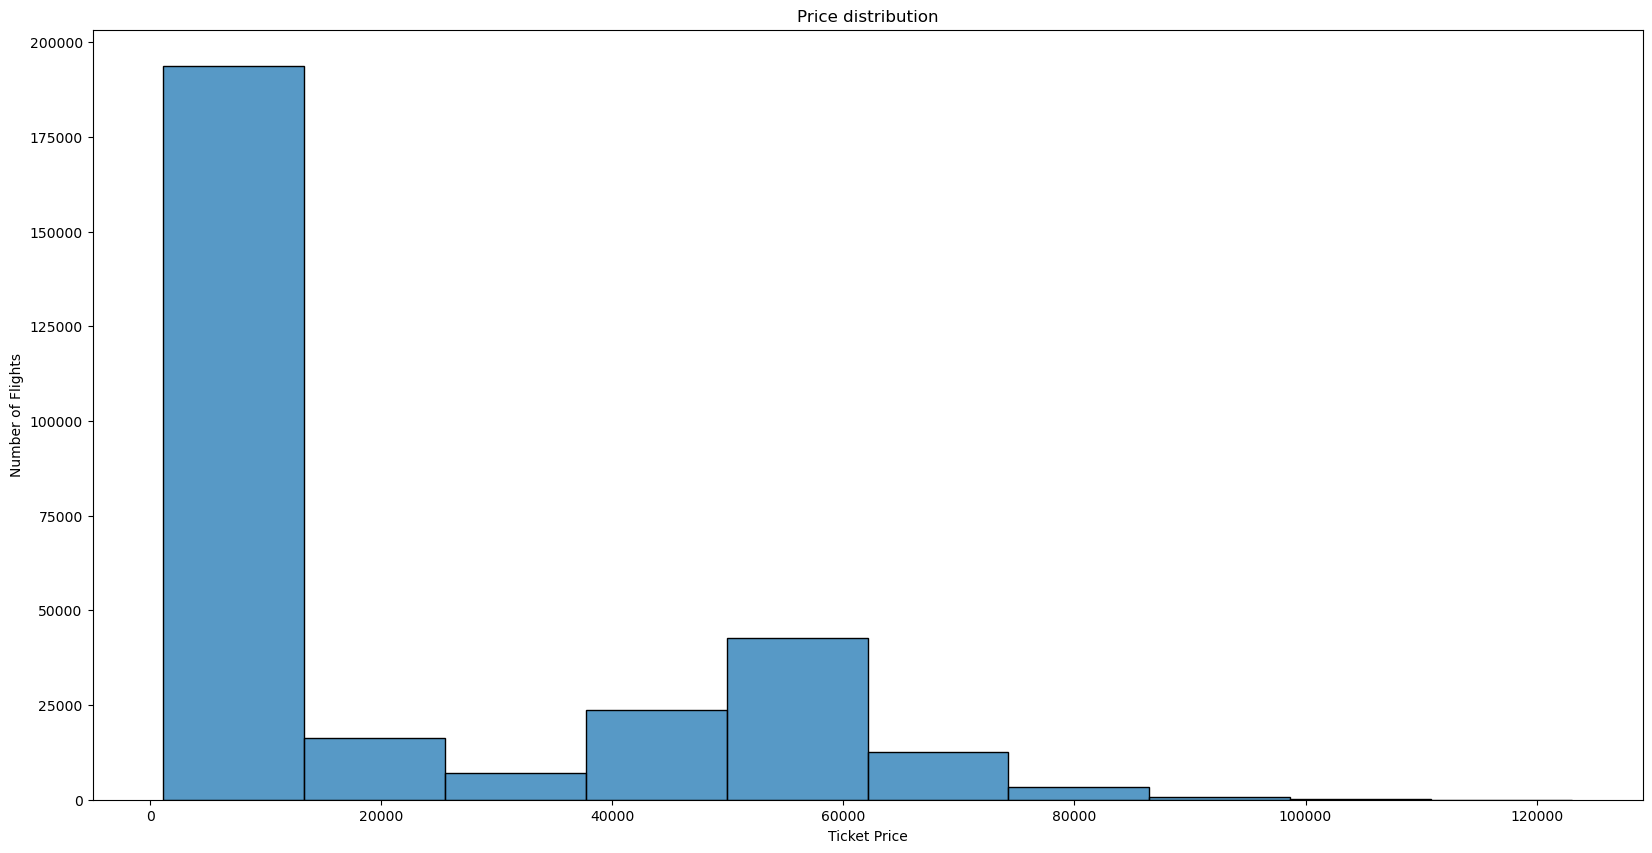

In [18]:
plt.figure(figsize=(20,10))
sns.histplot(airlines_df,x="price",bins=10)
plt.xlabel("Ticket Price")
plt.ylabel("Number of Flights")
plt.title("Price distribution")
plt.show()

Text(0.5, 1.0, 'boxplot for Ticket Prices')

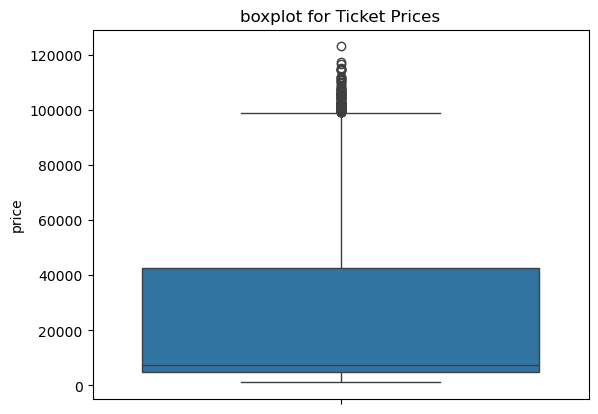

In [19]:
sns.boxplot(airlines_df["price"])
plt.title("boxplot for Ticket Prices")

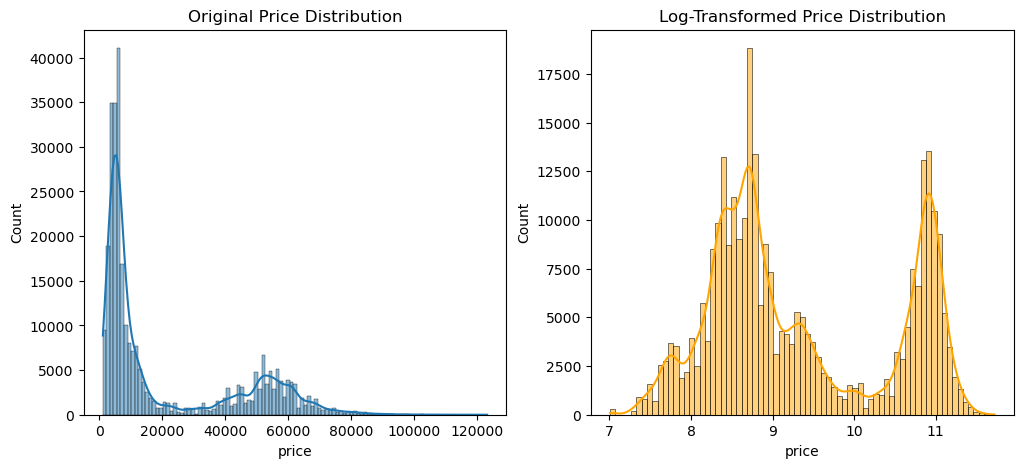

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(airlines_df['price'], kde=True)
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(airlines_df['price']), kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.show()

In [20]:
### here we have used boxplot also for pricing because it will help us more in indentifying outliers , median and , quartiles

##### 3.1.2 Duration

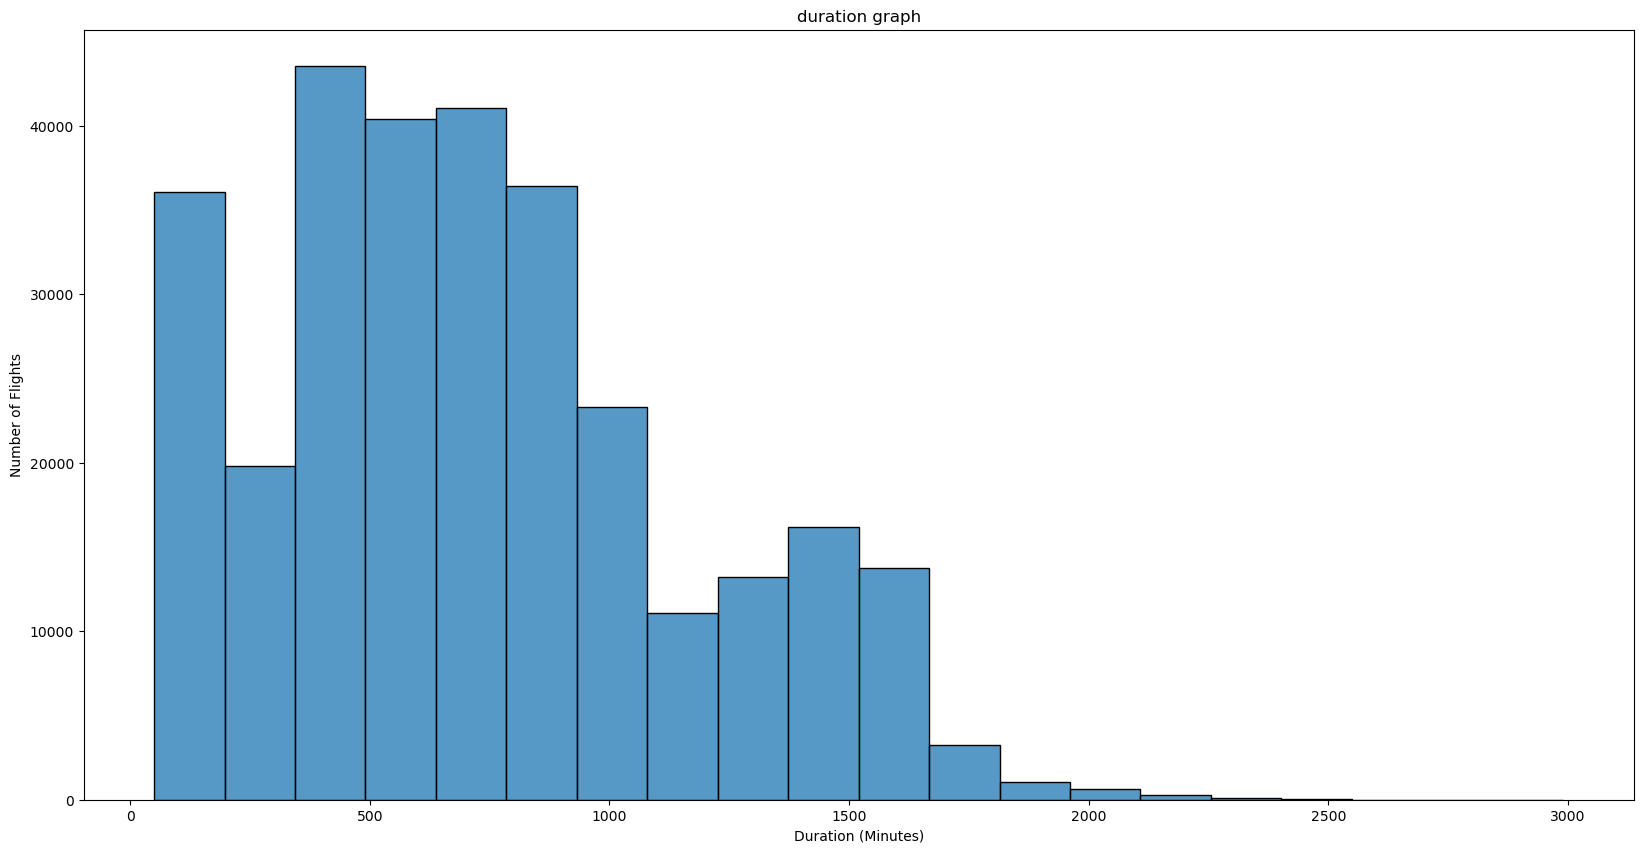

In [21]:
plt.figure(figsize=(20,10))
sns.histplot(airlines_df,x="duration_total_minutes",bins=20)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Flights")
plt.title("duration graph")
plt.show()

##### 3.1.3 Stops (categorical variable)

In [22]:
## for categorical variable we will use countplot 

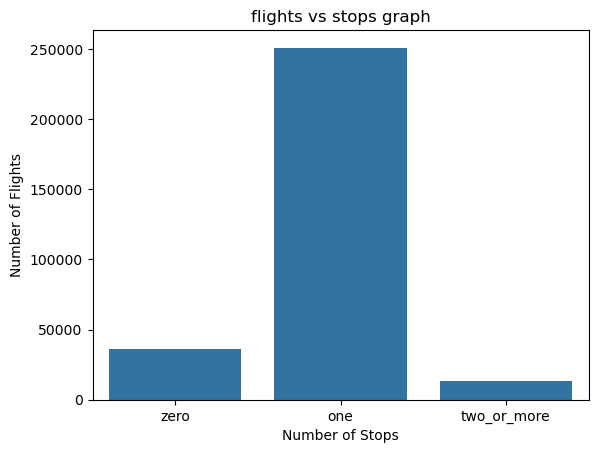

In [23]:
sns.countplot(airlines_df,x=airlines_df["stops"])
plt.title("flights vs stops graph")
plt.xlabel("Number of Stops")
plt.ylabel("Number of Flights")
plt.show()

##### 3.1.4. Airline (categorical variable)

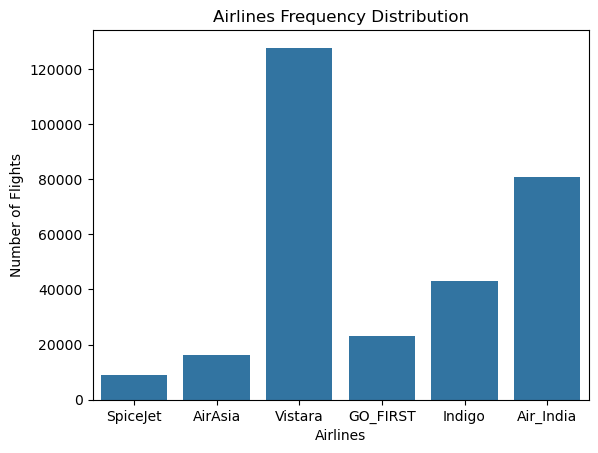

In [24]:
sns.countplot(airlines_df,x=airlines_df["airline"])
plt.title("Airlines Frequency Distribution")
plt.xlabel("Airlines")
plt.ylabel("Number of Flights")
plt.show()

#### 3.2   Bivariate Analysis

##### 3.2.1.  Price v/s Stops 

Text(0, 0.5, 'Price')

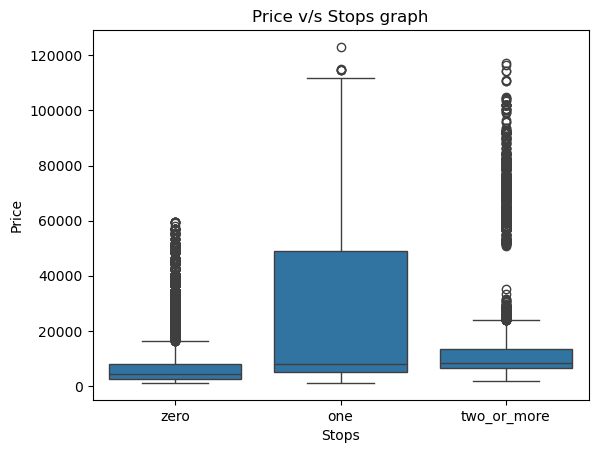

In [25]:
sns.boxplot(airlines_df,x=airlines_df["stops"],y=airlines_df["price"])
plt.title("Price v/s Stops graph")
plt.xlabel("Stops")
plt.ylabel("Price")


##### 3.2.2   Price v/s Airlines

Text(0, 0.5, 'Price')

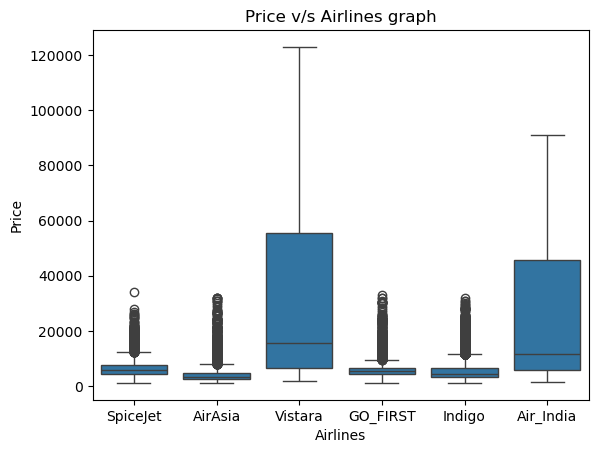

In [26]:
sns.boxplot(airlines_df,x=airlines_df["airline"],y=airlines_df["price"])
plt.title("Price v/s Airlines graph")
plt.xlabel("Airlines")
plt.ylabel("Price")

##### 3.2.3.   Price v/s Duration

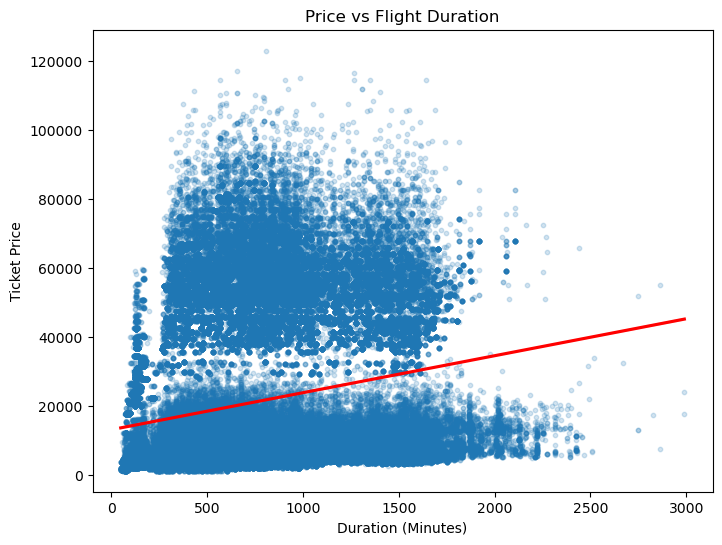

In [27]:

plt.figure(figsize=(8,6))
sns.regplot(x="duration_total_minutes",
            y="price",
            data=airlines_df,
            scatter_kws={"alpha":0.2, "s":10},
            line_kws={"color":"red"})

plt.xlabel("Duration (Minutes)")
plt.ylabel("Ticket Price")
plt.title("Price vs Flight Duration")
plt.show()

## 4. Hypothesis Testing

#### 4.1  Hypothesis 1: Price differs across airlines (ANOVA)

In [28]:
## here we have hypothesis as:
#    null hypothesis = mean price is same for all airlines
#   alternate hypothesis = any one airline has different price

In [29]:
import pandas as pd
from scipy import stats

In [30]:
price_group=[]
for airline in airlines_df["airline"].unique():
    price_group.append(airlines_df[airlines_df["airline"]==airline]["price"])

In [31]:
f_stat, p_value = stats.f_oneway(*price_group)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 17194.402096092355
P-Value: 0.0


Decision :-

Since our p-value < 0.05 so we reject the null hypothese and we can conclude that:
There are significant differences in prices of airlines.

#### 4.2 Hypothesis 2: Ticket prices differ based on departure time (T-test)

In [32]:
## Defining hypothesis
##  Null Hypothesis (H₀): Ticket prices are the same for both departure times.
##  Alternative Hypothesis (H₁): Ticket prices are different.

In [33]:
from scipy.stats import ttest_ind

In [34]:
airlines_df["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [35]:
## note:here we have more than 2 categories for departure time so we can either select any 2 categories and 
##      use T-test or instead we can use one way ANOVA
##      but since we are told so we will use T-test only

In [36]:
morning_departure=airlines_df[airlines_df["departure_time"]=="Morning"]["price"]         
Evening_departure=airlines_df[airlines_df["departure_time"]=="Evening"]["price"]

In [37]:
t_stat, p_value = ttest_ind(morning_departure, Evening_departure)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 3.1847901908835725
P-value: 0.0014489158714198617


 Decision =>
 
 since our p-value < 0.05 so we will reject null hypothesis and coclude that Ticket prices are different.

#### 4.3	Hypothesis 3: Duration is correlated with price (Pearson correlation)

In [38]:
# defining hypothesis

##  Null Hypothesis (H₀): There is no correlation between duration and price.
##  Alternative Hypothesis (H₁): There is a correlation between duration and price.

In [39]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(airlines_df['duration_total_minutes'], airlines_df['price'])

print("Correlation coefficient (r):", corr_coef)
print("P-value:", p_value)

Correlation coefficient (r): 0.20422141671604244
P-value: 0.0


 Decision :-

 since our 0 < r < 0.3 so there exists weak positive relation 
 also our p-value < 0.005 so we reject the null hypothesis and conclude that there is correlation between price and duration